## Leonard Molano  |  Group 6  |   Novemver 21, 2020
### Bank Churn Project with Neural Networks

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e.
customers leaving and joining another service provider. It is important to understand which
aspects of the service influence a customer's decision in this regard. Management can
concentrate efforts on the improvement of service, keeping in mind these priorities.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

sns.set(color_codes=True) 

In [2]:
bank_data = pd.read_csv('bank.csv')

In [3]:
# Dropping irrelevant columns
bank_data = bank_data.drop('RowNumber', axis=1)
bank_data = bank_data.drop('CustomerId', axis=1)
bank_data = bank_data.drop('Surname', axis=1)

In [4]:
bank_data.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
bank_data.shape

(10000, 11)

In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
bank_data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
bank_data.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [10]:
bank_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [12]:
bank_data.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## Univarate Analysis

In [13]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


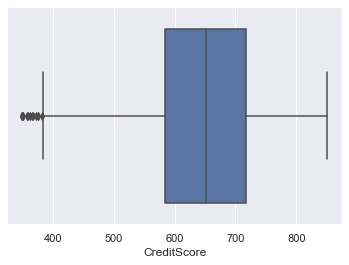

In [14]:
sns.boxplot(bank_data['CreditScore'])    

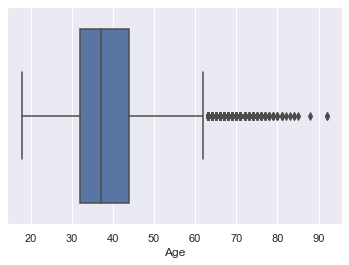

In [15]:
sns.boxplot(bank_data['Age'])

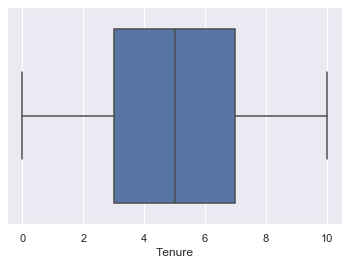

In [16]:
sns.boxplot(bank_data['Tenure']) 

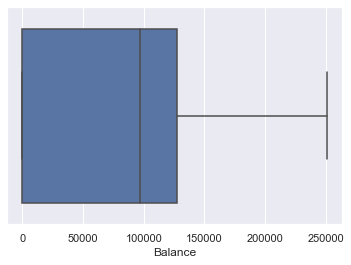

In [17]:
sns.boxplot(bank_data['Balance'])

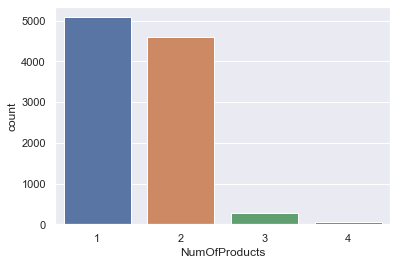

In [18]:
sns.countplot(bank_data['NumOfProducts'])

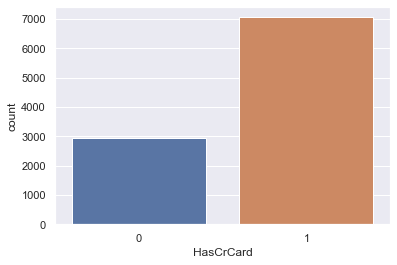

In [19]:
sns.countplot(bank_data['HasCrCard'])

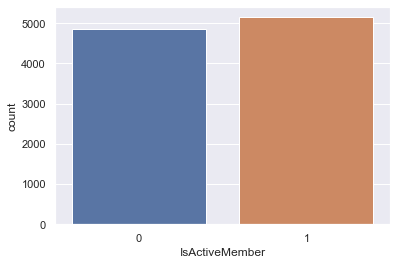

In [20]:
sns.countplot(bank_data['IsActiveMember'])

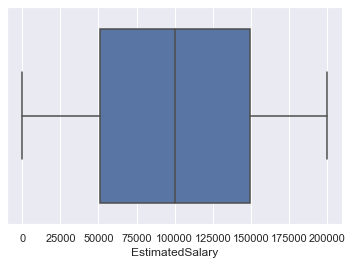

In [21]:
sns.boxplot(bank_data['EstimatedSalary'])

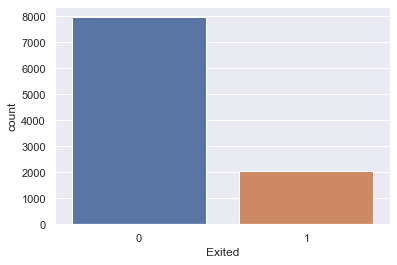

In [22]:
sns.countplot(bank_data['Exited'])

On two fields have extreme outliers: 'CreditScore' and 'Age'. All other fields seem balanced, except for 'NumOfProducts'. This field has most of the values as '1'or '2', and '3'and '4'are very under underrepresented. We will not remove the underrepresented fields since the range of options is soo small (4), I rather keep everything intact.

## Bivarate Analysis

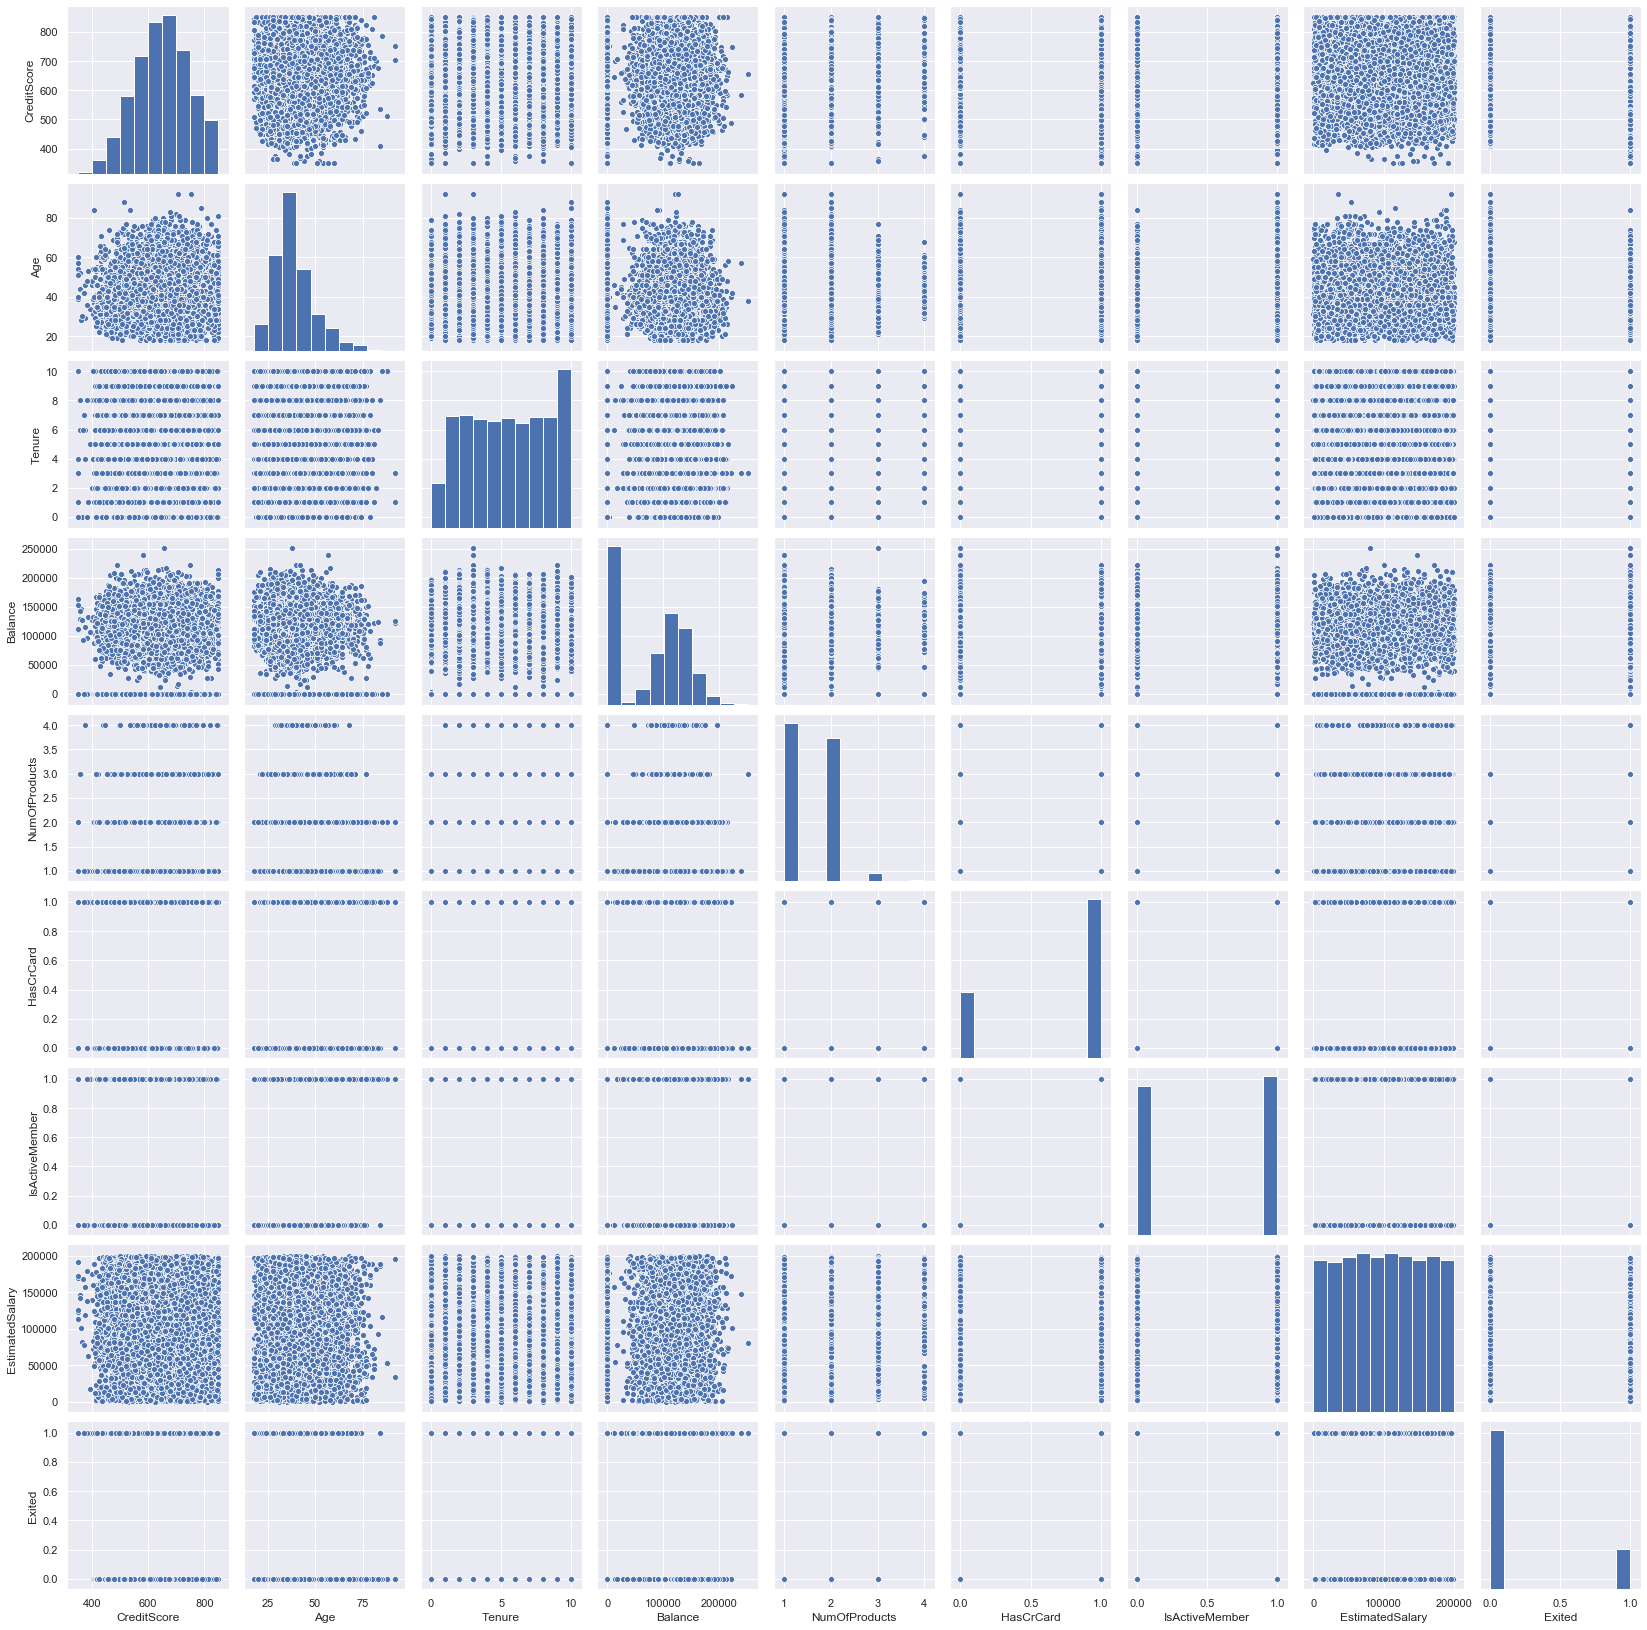

In [23]:
sns.pairplot(bank_data)

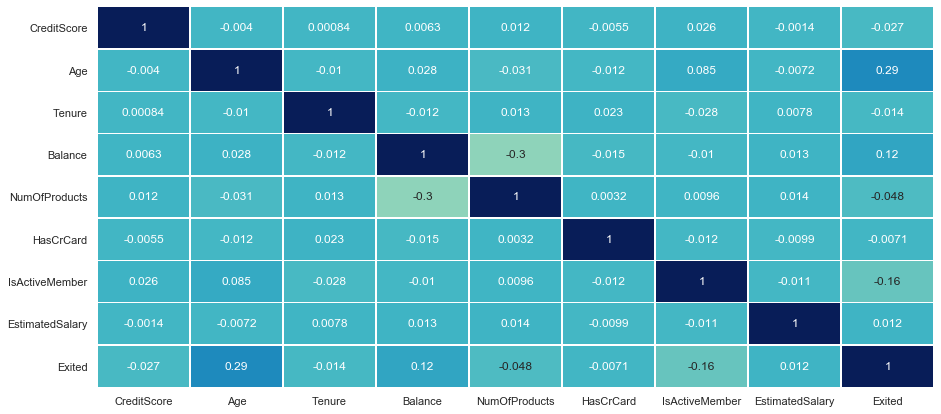

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(bank_data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

## Feature Engineering

In [26]:
bank_tmp = bank_data.copy()

In [27]:
# One Hot Encoding
oneHotCols = ['Geography', 'Gender']
bank_tmp = pd.get_dummies(bank_tmp, columns=oneHotCols)

In [29]:
cols_with_outliers = ['CreditScore', 'Age']

In [30]:
# Remove extreme outliers
for i in cols_with_outliers :
    median = bank_tmp[i].median()
    q1 = np.quantile(bank_tmp[i], 0.25)
    q3 = np.quantile(bank_tmp[i], 0.75)
    iqr = q3 - q1
    lw = q1 - (1.5 * iqr) 
    uw = q3 + (1.5 * iqr) 
    bank_tmp[i] = np.where((bank_tmp[i] < lw) | (bank_tmp[i] > uw) , median, bank_tmp[i])

In [66]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(bank_tmp)

StandardScaler(copy=True, with_mean=True, with_std=True)

## Creating the Model

In [67]:
x = bank_tmp.drop(['Exited'], axis=1).to_numpy()
y = bank_tmp['Exited'].to_numpy()

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [144]:
model = Sequential()

model.add(Dense(50, input_shape = (13,), activation = 'sigmoid')) #input layer
model.add(Dense(50, activation = 'sigmoid')) # hidden layer]
model.add(Dense(1, activation = 'relu')) # output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, validation_split = 0.3, verbose = False, epochs = 10) 
results = model.evaluate(x_test, y_test, verbose = False)    

print(model.metrics_names)
print(results)

['loss', 'accuracy']
[3.110697942097982, 0.79833335]


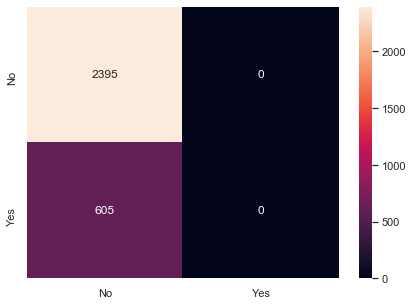

In [141]:
cm = confusion_matrix(y_test, y_pred_cls)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Conclusion

We have created a Neural Network Model which can predit weather a customer will leave or not in the next 6 months. This model has an Accuracy of 0.798 and a Loss of 3.11. The accuracy of this model is pretty good, the loss is not insignificant. In addition, when we see the confusion matrix we see we have no false positives/negatives. I believe this model is overfitted to the training data, and it is not recommended to be used on a production setting.

To improve the model we can try to implement droputs, add more data regularization, or reduce the complexity of the model. 